## SVXY strategy - Go long SVXY when price falls 50% from peak, double down if falls 50% further (75% overall from peak)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tradingWithPython as twp
from tradingWithPython import sharpe # general trading toolbox functions
import pandas as pd # pandas time series library
import quandl
quandl.ApiConfig.api_key = 'wxychbrgu7o7x3MRq4Hx'

C:\Users\chekitsch\Anaconda3\lib\site-packages\tradingWithPython\lib\cboe.py:11: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# read CSV from local drive
path1 = r'C:\Users\chekitsch\Documents\Trading\Historical data\VIX\vix_etf.csv'
etf = pd.read_csv(path1, index_col=0, header = 0, parse_dates=True)

In [5]:
# update SVXY and UVXY prices
existDate = etf.index[-1]
sDate = existDate + pd.tseries.offsets.Day(weekday=1)   # shift forward existDate by 1 week day
svxy = quandl.get('EOD/SVXY', start_date=sDate.date().isoformat())
uvxy = quandl.get('EOD/UVXY', start_date=sDate.date().isoformat())

if len(svxy) > 0:
    etfprice = [[]for i in range(3)]
    for i in range(len(svxy)):
        etfprice[0].append(svxy.index[i])
        etfprice[1].append(svxy.Adj_Close[i])
        etfprice[2].append(uvxy.Adj_Close[i])

    d = dict(list(zip(list(etf), etfprice[1:])))
    df = pd.DataFrame(d, index = pd.Index(etfprice[0]))
    etf = etf.append(df)
    etf.to_csv(path1)


In [19]:
highwatermark = np.zeros(len(etf.SVXY))
drawdown = np.zeros(len(etf.SVXY))
drawdown_pct = np.zeros(len(etf.SVXY))

In [20]:
for i in range(1, len(etf.SVXY)):
    highwatermark[i] = max(highwatermark[i-1], etf.SVXY[i])
    drawdown[i] = (highwatermark[i] - etf.SVXY[i])
    drawdown_pct[i] = drawdown[i] / highwatermark[i]

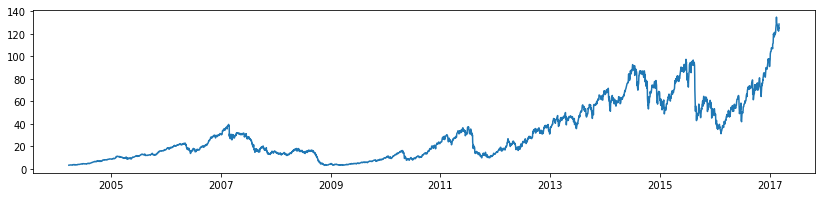

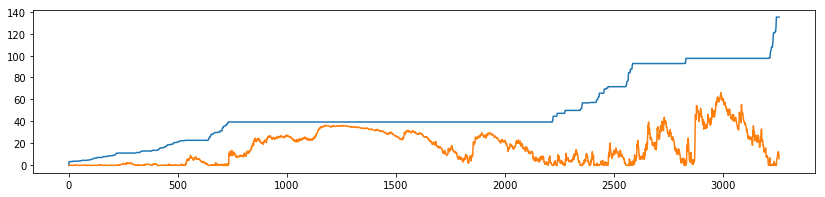

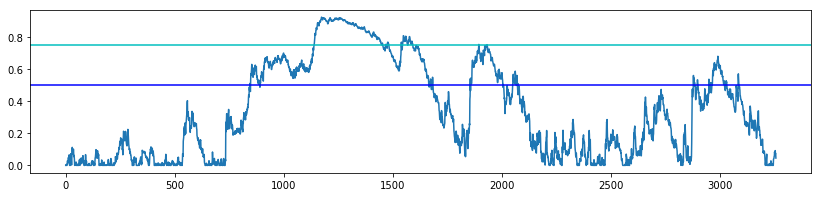

In [47]:
figsize(14,3)
plot(etf.SVXY)
figure()
plot(highwatermark)
plot(drawdown)
figure()
plot(drawdown_pct)
plt.axhline(y=0.5, color='b')
plt.axhline(y=0.75, color='c')